https://bit.ly/FEML-12-text

## Импорты

In [ ]:
import pandas as pd

## CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',]

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


n-граммы

In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 3))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names_out())
print(X2.toarray())

['and' 'and this' 'and this is' 'document' 'document is' 'document is the'
 'first' 'first document' 'is' 'is the' 'is the first' 'is the second'
 'is the third' 'is this' 'is this the' 'one' 'second' 'second document'
 'the' 'the first' 'the first document' 'the second' 'the second document'
 'the third' 'the third one' 'third' 'third one' 'this' 'this document'
 'this document is' 'this is' 'this is the' 'this the' 'this the first']
[[0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 2 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1]]


In [ ]:
pd.DataFrame(X2.toarray(), columns=vectorizer2.get_feature_names_out())

,and,and this,and this is,document,document is,document is the,first,first document,is,is the,...,the third one,third,third one,this,this document,this document is,this is,this is the,this the,this the first
0,0,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,1,0,0
1,0,0,0,2,1,1,0,0,1,1,...,0,0,0,1,1,1,0,0,0,0
2,1,1,1,0,0,0,0,0,1,1,...,1,1,1,1,0,0,1,1,0,0
3,0,0,0,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,1,1


## TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X)

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483


In [ ]:
vectorizer.idf_

array([1.91629073, 1.22314355, 1.51082562, 1.        , 1.91629073,
       1.91629073, 1.        , 1.91629073, 1.        ])

In [ ]:
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


## Токенизация и разбор предложения

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
text = "Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East. It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice."
sentences = sent_tokenize(text)
for sentence in sentences:
    tokens = word_tokenize(sentence)
    print(tokens)

['Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.']
['Its', 'history', 'can', 'be', 'traced', 'back', 'nearly', '5,000', 'years', 'to', 'archeological', 'discoveries', 'in', 'the', 'Middle', 'East', '.']
['It', 'is', 'a', 'two', 'player', 'game', 'where', 'each', 'player', 'has', 'fifteen', 'checkers', 'which', 'move', 'between', 'twenty-four', 'points', 'according', 'to', 'the', 'roll', 'of', 'two', 'dice', '.']


In [ ]:
sentences

['Backgammon is one of the oldest known board games.',
 'Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East.',
 'It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.']

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 38.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=b65f5b09811e20da5014fc263c96a41efd686faaab58288f44507f107e835e51
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2
import re
morph = pymorphy2.MorphAnalyzer()
stop_words = stopwords.words('russian')

text = "Обработка текстов на естественном языке — общее направление искусственного интеллекта и математической лингвистики. Оно изучает проблемы компьютерного анализа и синтеза текстов на естественных языках. Применительно к искусственному интеллекту анализ означает понимание языка, а синтез — генерацию грамотного текста."
sentences = nltk.sent_tokenize(text, language="russian")

for sentence in sentences:
    print('___________________')
    print(sentence)
    sentence_ = re.sub(r"[^А-Яа-яёЁ ]", "", sentence)
    print(sentence_)
    tokens = nltk.word_tokenize(sentence_)
    print(tokens)
    tokens = [i for i in tokens if (i not in stop_words)]
    print(tokens)
    tokens = [morph.parse(i)[0].normal_form for i in tokens]
    print(tokens)

___________________
Обработка текстов на естественном языке — общее направление искусственного интеллекта и математической лингвистики.
Обработка текстов на естественном языке  общее направление искусственного интеллекта и математической лингвистики
['Обработка', 'текстов', 'на', 'естественном', 'языке', 'общее', 'направление', 'искусственного', 'интеллекта', 'и', 'математической', 'лингвистики']
['Обработка', 'текстов', 'естественном', 'языке', 'общее', 'направление', 'искусственного', 'интеллекта', 'математической', 'лингвистики']
['обработка', 'текст', 'естественный', 'язык', 'общий', 'направление', 'искусственный', 'интеллект', 'математический', 'лингвистика']
___________________
Оно изучает проблемы компьютерного анализа и синтеза текстов на естественных языках.
Оно изучает проблемы компьютерного анализа и синтеза текстов на естественных языках
['Оно', 'изучает', 'проблемы', 'компьютерного', 'анализа', 'и', 'синтеза', 'текстов', 'на', 'естественных', 'языках']
['Оно', 'изучает', '

## Распознание спама


Загружаем данные и разархивируем

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

--2023-06-15 16:23:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z     [ <=>                ] 198.65K  1.02MB/s    in 0.2s    

2023-06-15 16:23:40 (1.02 MB/s) - ‘smsspamcollection.zip’ saved [203415]



In [ ]:
!unzip smsspamcollection.zip

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_table('SMSSpamCollection', sep='\t', header=None, names=['label','sms_message'])

In [ ]:
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

### Логистическая регрессия + TFIDF

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(df['sms_message'].tolist())

TfidfVectorizer()

In [ ]:
df['sms_message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms_message, Length: 5572, dtype: object

In [ ]:
vectorizer.transform(['The guy did some bitching but I acted like'])

<1x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
res_tfidf = vectorizer.transform(df['sms_message'].tolist())
res_tfidf

<5572x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [ ]:
res_tfidf[0].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder().fit(df['label'])

In [ ]:
df['cat_label'] = le.transform(df['label'])

In [ ]:
df['cat_label'].value_counts()

0    4825
1     747
Name: cat_label, dtype: int64

In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(res_tfidf, df['cat_label'], test_size=0.2, random_state=1)

In [ ]:
lr = LogisticRegression().fit(X_tr, y_tr)

In [ ]:
y_pred = lr.predict(X_ts)
f1_score(y_ts, y_pred)

0.8659003831417624

In [ ]:
print(classification_report(y_ts, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       968
           1       0.99      0.77      0.87       147

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



### Наивный Байесовский классификатор

In [ ]:
#Делим на трейновую и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['cat_label'], random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Считаем количество слов в предложениях
# получим матрицу размером (количество предложений Х размер словаря)

count_vector = CountVectorizer(max_features=1000)
train_tensor = count_vector.fit_transform(X_train).toarray().astype('float')
test_tensor = count_vector.transform(X_test).toarray().astype('float')

In [ ]:
# размер трейновой выборки
train_tensor.shape

(4179, 1000)

In [ ]:
# всего слов в предложениях
train_tensor.sum()

47637.0

In [ ]:
pd.DataFrame(train_tensor, columns=count_vector.get_feature_names_out())

,000,04,0800,08000839402,08000930705,10,100,1000,10p,11,...,yes,yesterday,yet,yo,you,your,yours,yourself,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# тензор с предложениями класса spam
spam_train_tensor = train_tensor[(y_train == 1).values]

# тензор с предложениями класса not_spam
not_spam_train_tensor = train_tensor[(y_train == 0).values]

In [ ]:
spam_train_tensor.sum()

9857.0

In [ ]:
not_spam_train_tensor.sum()

37780.0

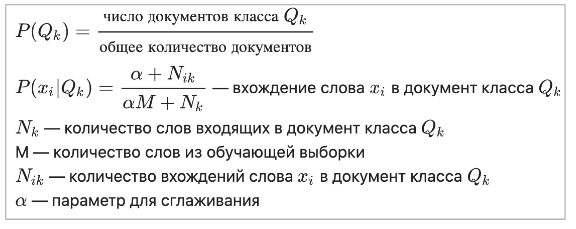

In [ ]:
# spam_train_tensor.sum(axis=0)

In [ ]:
# spam_train_tensor[:, 1].sum()

In [ ]:
# Вероятность слова при условии что предложение спам
p_w_spam = (spam_train_tensor.sum(axis=0) + 1) / (train_tensor.shape[0] + spam_train_tensor.sum())

# Вероятность слова при условии что предложение не спам
p_w_not_spam = (not_spam_train_tensor.sum(axis=0) + 1) / (train_tensor.shape[0] + not_spam_train_tensor.sum())

In [ ]:
p_w_spam[:10], p_w_not_spam[:10]

(array([0.00170989, 0.00071245, 0.0007837 , 0.0007837 , 0.00085494,
        0.00142491, 0.00213736, 0.00227985, 0.00149615, 0.00085494]),
 array([2.38327892e-05, 2.38327892e-05, 2.38327892e-05, 2.38327892e-05,
        2.38327892e-05, 2.14495102e-04, 4.76655783e-05, 2.38327892e-05,
        2.38327892e-05, 7.14983675e-05]))

In [ ]:
# проверим на одном семпле
test_sample = test_tensor[0]
test_sample

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
(test_sample * p_w_spam).sum()

0.013465374750641208

In [ ]:
(test_sample * p_w_not_spam).sum()

0.023308467789985462

In [ ]:
# видно что значение против спама больше, чем значение за спам
# соответственно значение не спам

In [ ]:
# посчитаем для всей тестовой выборки

# размер тестовой выборки
test_tensor.shape

(1393, 1000)

In [ ]:
#посчитаем предсказания как сравнение величинв за спам и против спама
y_pred = (test_tensor*p_w_spam).sum(axis=1) >= (test_tensor*p_w_not_spam).sum(axis=1)

In [ ]:
# предсказанные значения
y_pred.astype(int)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# истиные значение
y_test.to_numpy()

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# сравним реальные метки с предсказанными
test = (y_pred.astype(int) == y_test.to_numpy())

In [ ]:
# посчитаем точность модели как отношение количество совпадений к размеру выборки
test.sum().item() / test.shape[0]

0.9016511127063891

In [ ]:
print(classification_report(y_test.to_numpy(), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1208
           1       0.59      0.83      0.69       185

    accuracy                           0.90      1393
   macro avg       0.78      0.87      0.82      1393
weighted avg       0.92      0.90      0.91      1393

